# Logistic Regression

# Application Flow
Logistic Regression is one of the most fundamental algorithms for classification in the Machine Learning world.
But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of aMachine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding thedeployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboardsbased on the client requirements. A typical lifecycle diagram for a machine learning model looks like:
Introduction

# 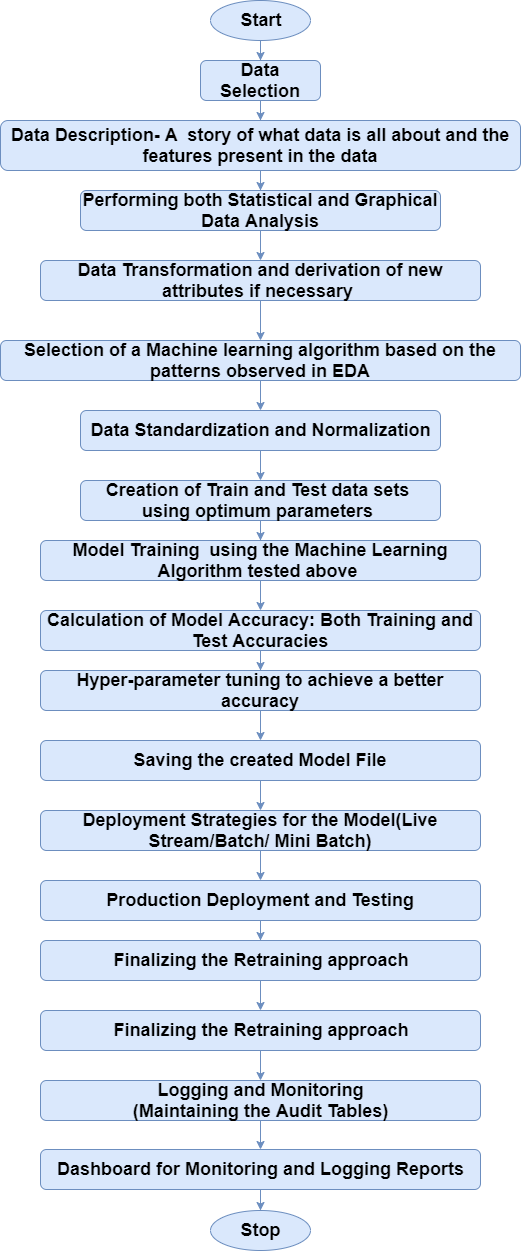

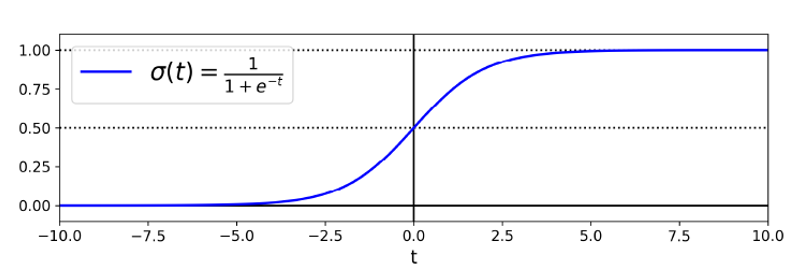

Why do we use the Sigmoid Function?
1) The sigmoid function’s range is bounded between 0 and 1. Thus it’s useful in calculating the probability for the Logistic function. 2) It’s derivativeis easy to calculate than other functions which is useful during gradient descent calculation. 3) It is a simple way of introducing non-linearity to themodel.


Although there are other functions as well, which can be used, but sigmoid is the most common function used for logistic regression.
The logistic function is given as:

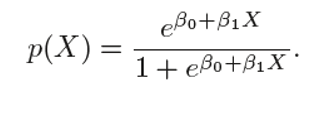

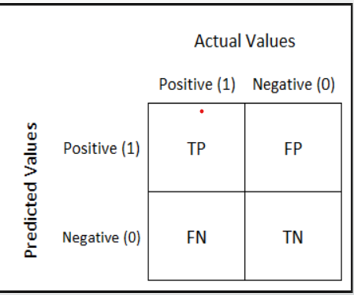

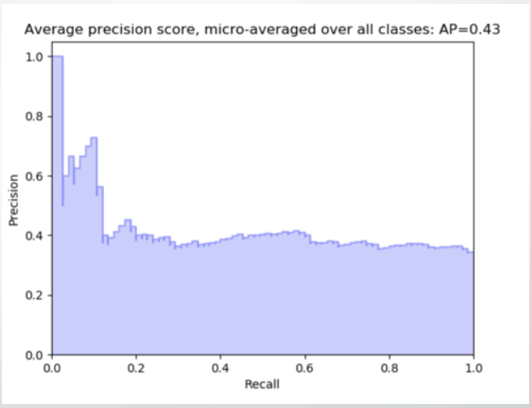

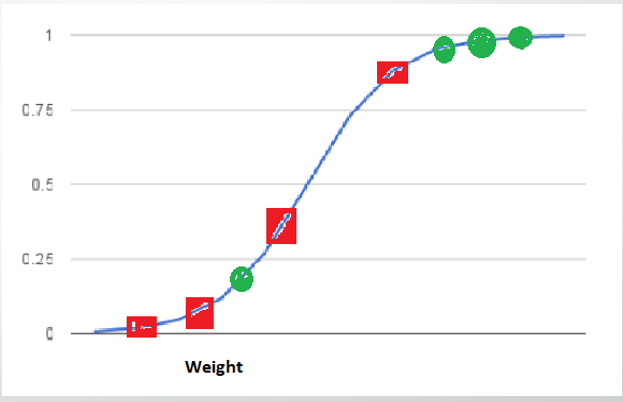

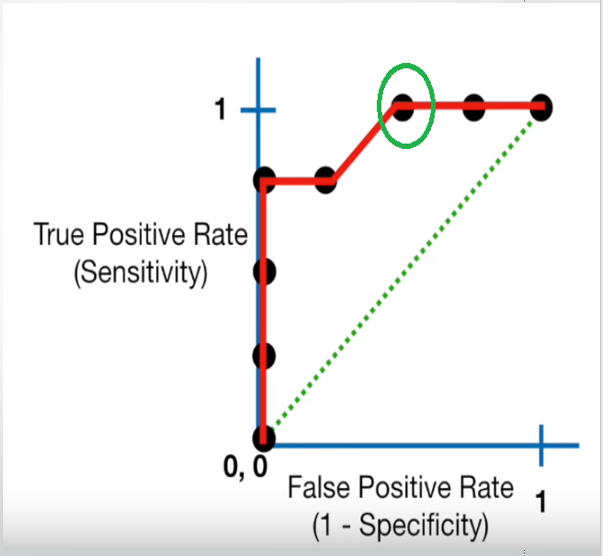

Mathematically, it represents the various confusion matrices for various thresholds. Each black dot is one confusion matrix.
The green dotted line represents the scenario when the true positive rate equals the false positive rate.
As evident from the curve, as we move from the rightmost dot towards left, after a certain threshold, the false positive rate decreases.
After some time, the false positive rate becomes zero.
The point encircled in green is the best point as it predicts all the values correctly and keeps the False positive as a minimum.
But that is not a rule of thumb. Based on the requirement, we need to select the point of a threshold.
The ROC curve answers our question of which threshold to choose.

But we have a confusion!!

Let’s suppose that we used different classification algorithms, and different ROCs for the corresponding algorithms have been plotted. The questionis: which algorithm to choose now? The answer is to calculate the area under each ROC curve.

# AUC(Area Under Curve)


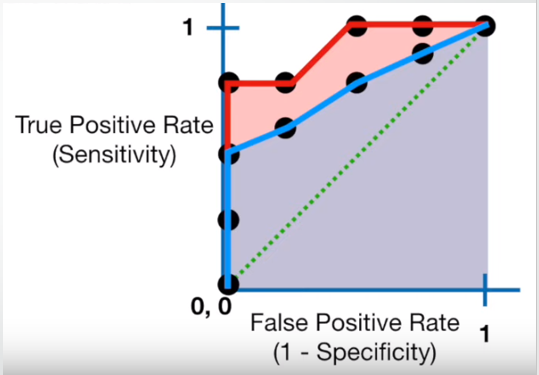

It helps us to choose the best model amongst the models for which we have plotted the ROC curves

The best model is the one which encompasses the maximum area under it.

In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area thanthe blue one

## Python Implementation

# Problem satement

Based on the pima Indians historical diabetes data, build a machine learning binary classification model to predict if the person is diabetic or Not based on below features

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetespedigreefunction,Age

# Label 
Outcome

In [1]:
#Let's start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv") # Reading the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems that there are no missing values in our data. Great ,let's see the distribution of data

# Data preprocessing (Analysis(EDA))

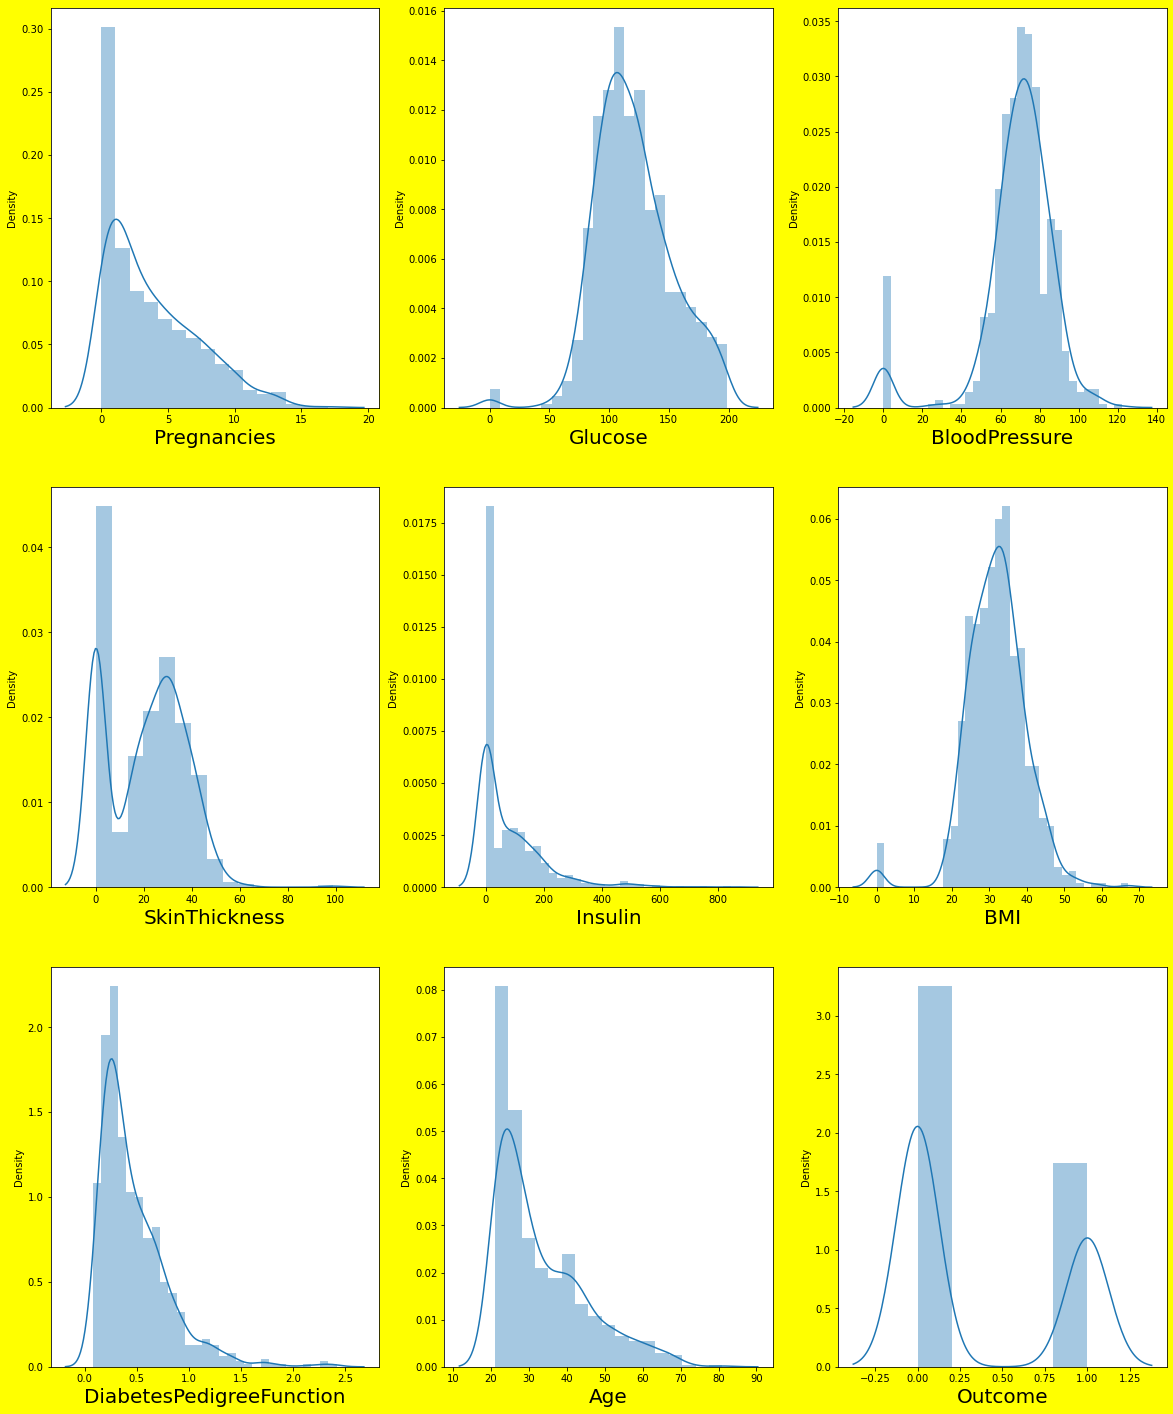

In [5]:
#Let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:   # as  there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible.You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace itwith their respective mean values.

Let's do the latter.

In [6]:
# replacing zero values with the mean of the column

data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())

data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

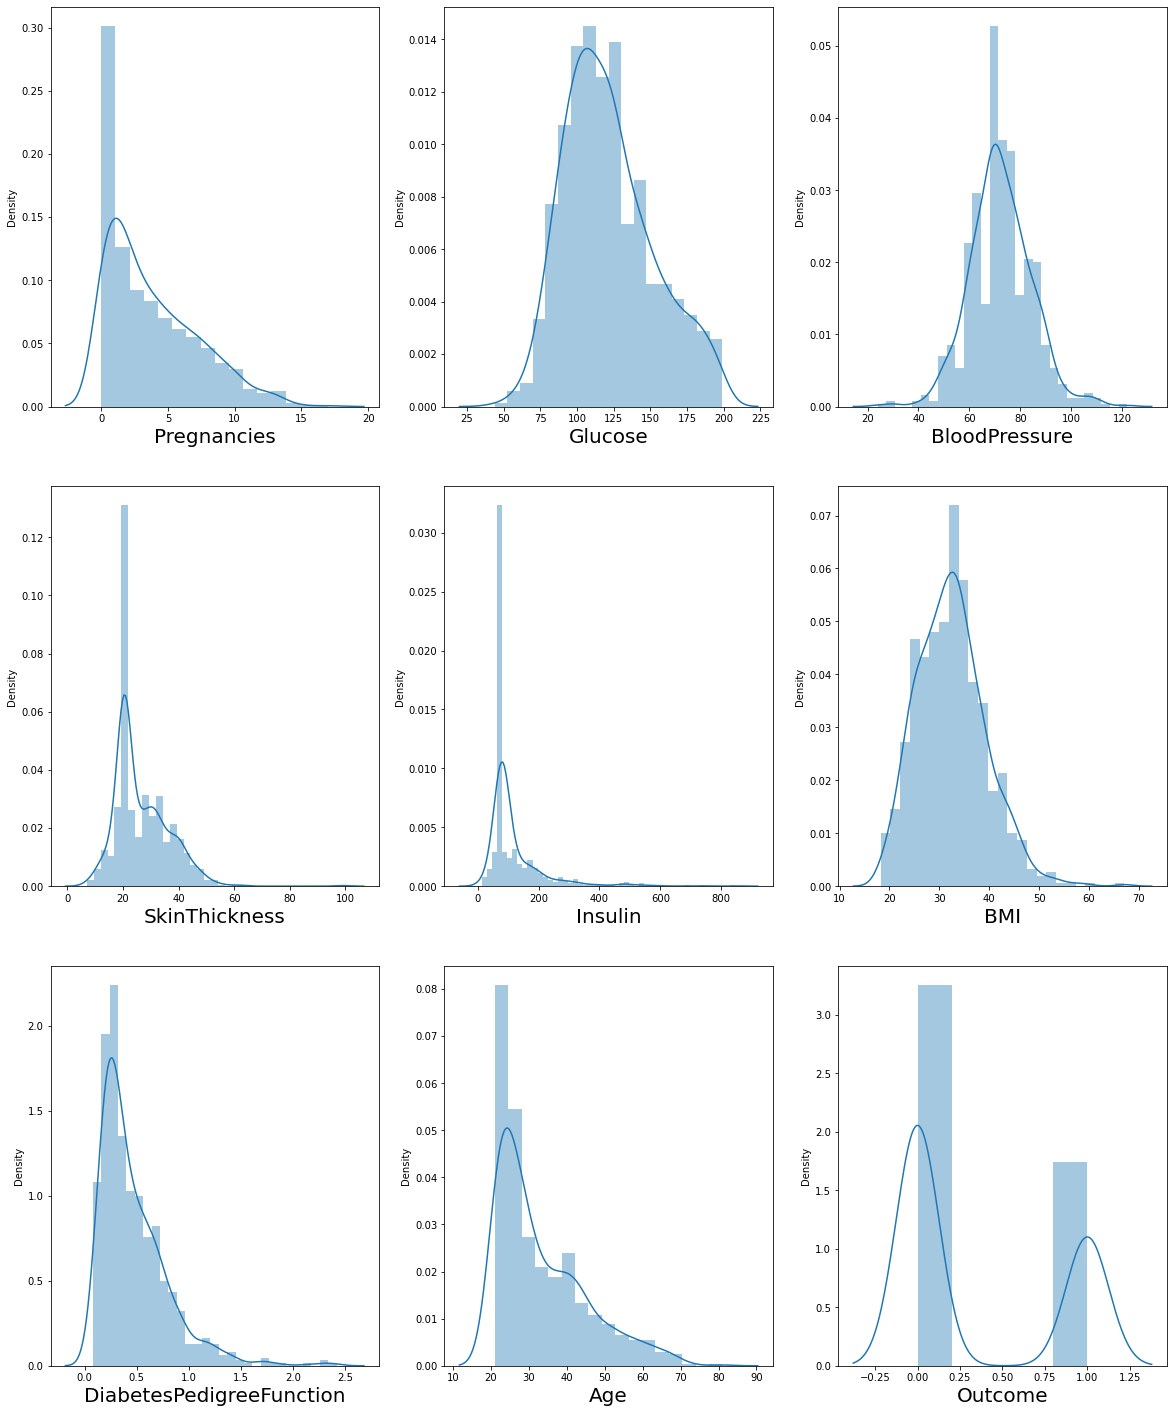

In [7]:
#Let's see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=9:   # as  there are 9 columns in the data
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    
    plotnumber+=1
plt.show()

Now we have dealt with the 0 values and data looks better.But, there still are outliers present in some columns.Let's deal with them.

In [8]:
df_features= data.drop('Outcome',axis=1)

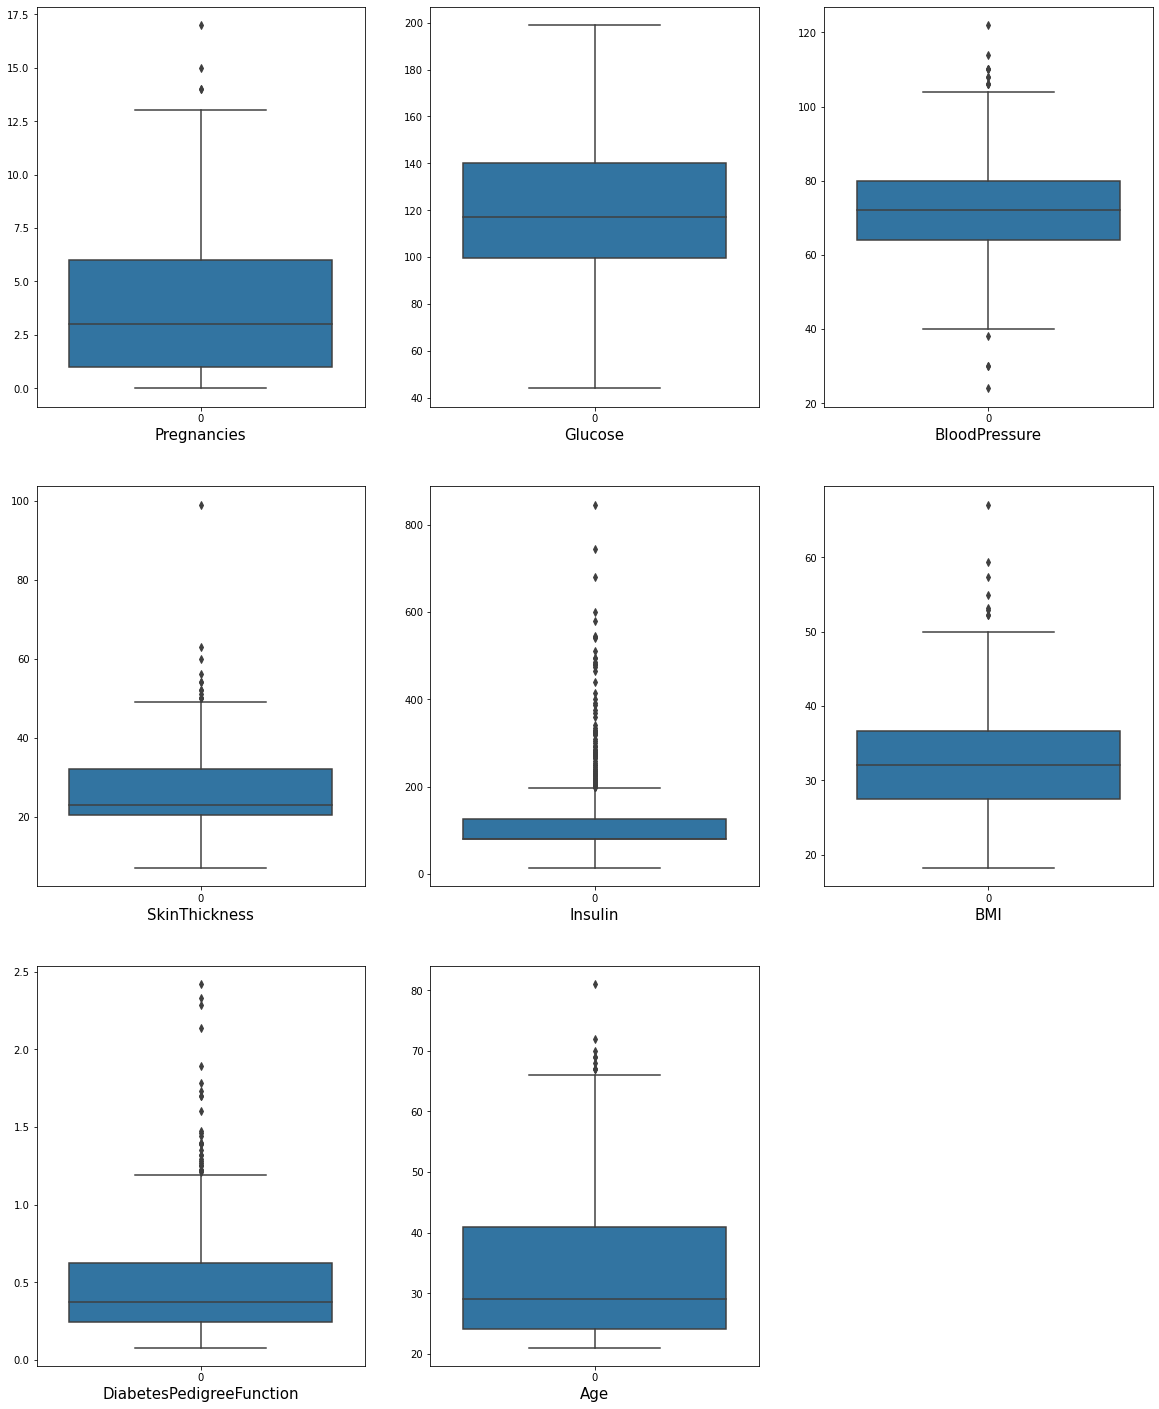

In [9]:
# visualize the outliers using boxplot

plt.figure(figsize=(20,25))
graph=1

for column in df_features:
    if graph<=9:   # as  there are 9 columns in the data
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
    
    
    graph+=1
plt.show()

In [10]:
data.shape

(768, 9)

In [11]:
# Find the IQR (inter quantile range) to identify outliers

#1st quantile
q1=data.quantile(0.25)
# 3rd quantile
q3=data.quantile(0.75) 

# IQR
iqr=q3-q1

# outlier detection formula

# higher side==> Q3 + (1.5 * IQR)
# Lower side==> Q1- (1.5 * IQR)

In [12]:
# validating one outlier
preg_high=(q3.Pregnancies + (1.5 * iqr.Pregnancies))
preg_high

13.5

In [13]:
# check the indexes which have higher values
index=np.where(data['Pregnancies']> preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [14]:
# Drop the index which we found in the above cell
data=data.drop(data.index[index])
data.shape

(764, 9)

In [15]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [16]:
bp_high=(q3.BloodPressure + (1.5* iqr.BloodPressure))
print(bp_high)

index= np.where(data['BloodPressure']> bp_high)

data  =data.drop(data.index[index])

print(data.shape)

data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:

index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

index

data  =data.drop(data.index[index])

print(data.shape)

data.reset_index()

index

In [18]:
st_high=(q3.SkinThickness + (1.5 * iqr.SkinThickness))
print(st_high)
index=np.where(data['SkinThickness']> st_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
insu_high=(q3.Insulin + (1.5 * iqr.Insulin))
print(insu_high)
index=np.where(data['Insulin']> insu_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


index

In [20]:
bmi_high=(q3.BMI + (1.5 * iqr.BMI))
print(bmi_high)
index=np.where(data['BMI']> bmi_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
dpf_high=(q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print(dpf_high)
index=np.where(data['DiabetesPedigreeFunction']> dpf_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.2
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
age_high=(q3.Age + (1.5 * iqr.Age))
print(age_high)
index=np.where(data['Age']> age_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

66.5
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
bp_low=(q1.BloodPressure -(1.5* iqr.BloodPressure))
print(bp_low)

index= np.where(data['BloodPressure'] < bp_low)

data = data.drop(data.index[index])

print(data.shape)

data.reset_index()





40.0
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


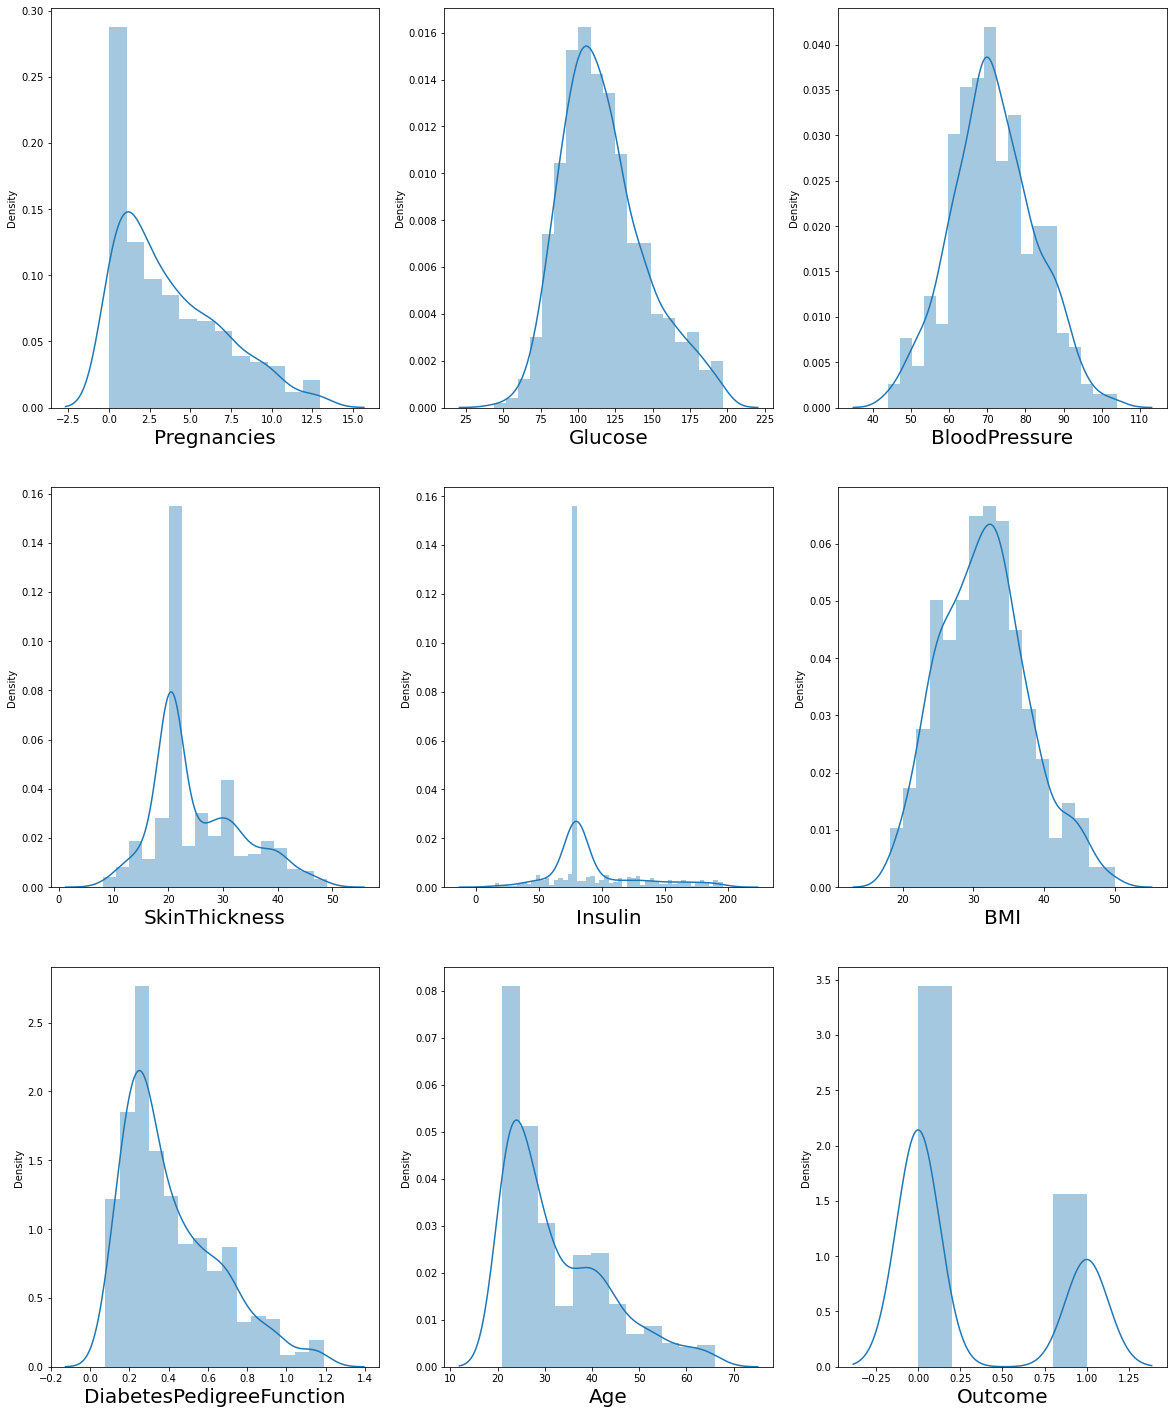

In [24]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If ourmodel doesn't work with accuracy, we will come back for more preprocessing.

In [25]:
x= data.drop(columns=['Outcome'])
y= data['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

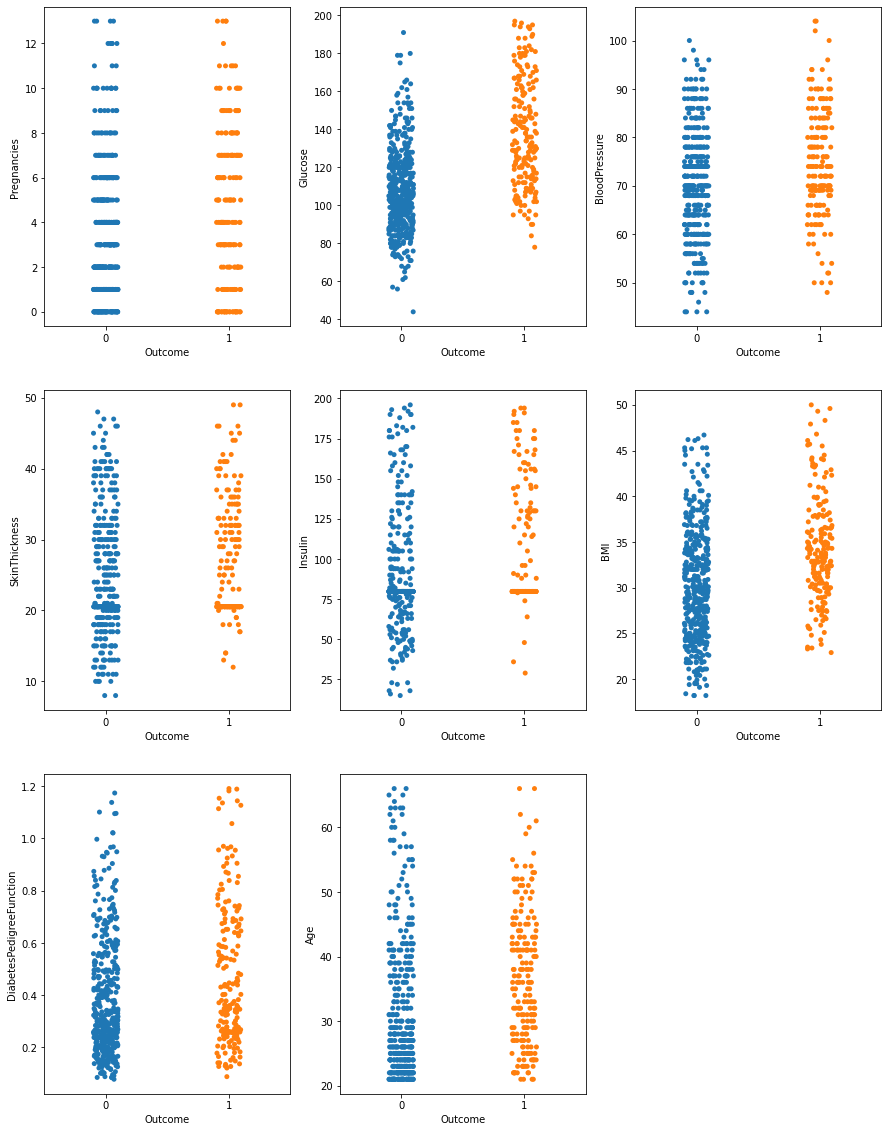

In [35]:
# Let's see how features are related to class

plt.figure(figsize=(15,20))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
    
plt.show()

Great!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [40]:
scalar = StandardScaler()
x_scaled =scalar.fit_transform(x)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [41]:
x_scaled.shape[1]

8

In [42]:
# finding variance inflation factor in each scaled column i.e x_scaled.shape[1] (1/(1-R2))

In [43]:
vif=pd.DataFrame()
vif["vif"]= [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif["Features"]= x.columns

# Let's check the values

vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Beforethat, let's split our data in test and training set.

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [45]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

Let's see how well our model performs on the test data set.

In [46]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int64)

In [47]:
# Model Accuracy

accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [48]:
#confusion Matrix

conf_mat=confusion_matrix(y_test,y_pred)
conf_mat


array([[94, 11],
       [26, 24]], dtype=int64)

In [49]:
#Let's check Accuracy manually

(94+24)/(94+24+11+26)

0.7612903225806451

similarly you can manually calculate recall/precision/F1 score

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.69      0.48      0.56        50

    accuracy                           0.76       155
   macro avg       0.73      0.69      0.70       155
weighted avg       0.75      0.76      0.75       155



In [52]:
# ROC Curve

fpr,tpr,thresholds=roc_curve(y_test,y_pred)

#fpr -False Positive Rate increasing frequency #tpr -True Positive Rate increasing frequency #thresholds -Decreasing thresholds on the decisionfunction used to compute fpr and tpr. fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [53]:
# thresholds[0] means no instances predicted (it should be read from 0 - max)
print('Threshold=', thresholds)
print('True Positive rate=', tpr)
print('False Positive rate=', fpr)

Threshold= [2 1 0]
True Positive rate= [0.   0.48 1.  ]
False Positive rate= [0.        0.1047619 1.       ]


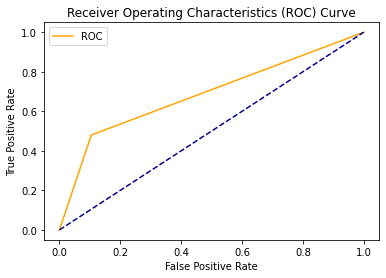

In [54]:
plt.plot(fpr,tpr,color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

In [55]:
# How much area it is covering (AUC)

auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.6876190476190477


# What is the significance of Roc curve and AUC?

In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model isthe best one to use for a given dataset. Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose.We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.


# Advantages of Logisitic Regression

It is very simple and easy to implement.

The output is more informative than other classification algorithms

It expresses the relationship between independent and dependent variables

Very effective with linearly seperable data

# Disadvantages of Logisitic Regression

Not effective with data which are not linearly seperable

Not as powerful as other classification models

Multiclass classifications are much easier to do with other algorithms than logisitic regression

It can only predict categorical outcomes

